CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: <!-- Your answers goes here -->
The two different sets of train/validation sets are given to train the model on the L2 Regression model,ie, implement Ridge regression for varying degrees on the sets obtained. The validation set for each one tests the validity of how accurate the built function is. By doing so, we are doing this by penalizing the higher order parameters by taking square of weights. Through this we are checking that the model chosen does not overfit the data for the two sample sets given. 
The second set of train and valid values also checks for the accuracy using the same function for a larger dataset. This enables us to check how the quantity of data affects the accuracy based on similar regularization coefficients selected considering the bias and variance of points. 

The first pair of training and validation is used to learn the model parameters(weights) for the various regularization  coefficients we pass and then verfied the output accuracy for the test dataset. The second dataset is tested on the unseen datasets(next train and valid set pair) to evaluate the performance on the basis of what we want. It checks how the same function operates for different unknown datasets. The goal is to not memorize the performance based on just the training set but to generalize the model for new data as well for best performance results. Also for train1-valid1 the proportions of 'yes' and 'no' is equal but for the train2-valid2 sets, the proportion of 'yes' to 'no' is 0.11 to 1.0(unbalanced class). 

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Answer for bullet one: Continuous numeric features: Age, balance, day, duration, campaign, pdays, previous
For the continuous numerical value variables, the min value is subtracted from variable and divided by the range(minmaxscaled) of the column. This preserves the natural shape of the original distribution and at the same time does not reduce the importance of outliers. The time series having data input values at different scales get bounded within the range 0 to 1. The below mentioned lambda function is applied to the dataframes of datasets.
Formula used:y = (x - min) / (max - min)
2.   Answer for bullet two: Categorical features: job, marital, education, default, housing, loan, contact, month, poutcome, Y
Here the columns 'housing','loan' and 'y' are binary values and the remaining columns have more than binary categories. For features having high cardinality, each category value is one-hot encoded into series of 0 and 1(dummy indicators). Here all the columns whose dummy variables were to be found for each category were prefixed with the column name. There form as many columns in the matrix as there are categories for the feature, thus solving the problem of unequal weights assigned to the categorical values. For the binary ones, yes/no columns were created in a similar way by checking if the string component in the category was yes or no. If the where condition finds 'yes' for column values then a 1 is returned and vice versa.
3.   Answer for bullet three: Yes, some of the features have missing values. 
They are listed as: Job, education, contact, poutcome. Also, pdays is a special type of column were more than 85% of values were -1 which were further changed to the median values obtained to reduce the variance of the curve. For other missing values in data that had the string value-'unknown', the values were also replaced by the median values of the column. At first the -1 and 'unknown' values were mapped to NaN which were later filled with median.
Note: chosen median and not mean because the data is an imbalanced normal distribution curve.
For replacing, I have used the 'find and replace' function which when finds the above mentioned strings and number('unknown' and '-1') with NaN which is further replaced with the median value computed over the column.



In [4]:
# PROBLEM 1, TASK 1 CODE GOES HERE
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from scipy.stats import norm

train1 = pd.read_csv('train_1.csv')
valid1 = pd.read_csv('valid_1.csv')
train2 = pd.read_csv('train_2.csv')
valid2 = pd.read_csv('valid_2.csv')
test = pd.read_csv('test.csv')
num_cols = ['age','balance','day','duration','campaign','pdays','previous']#numerical features
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']#categorical features


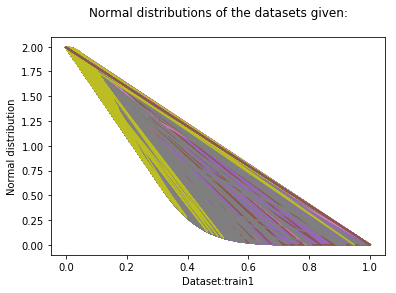

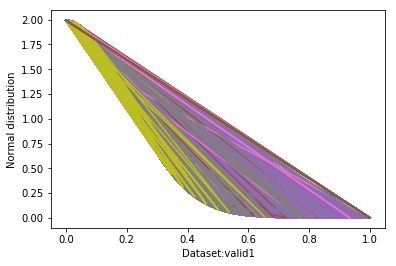

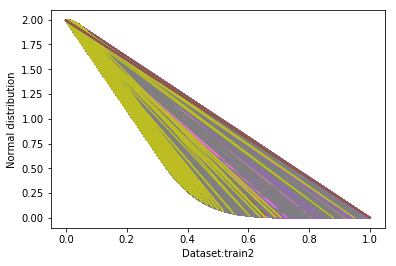

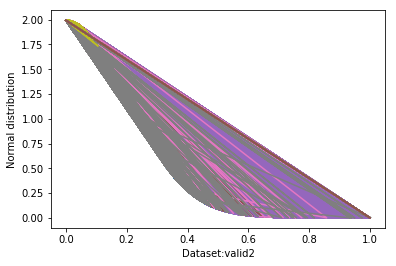

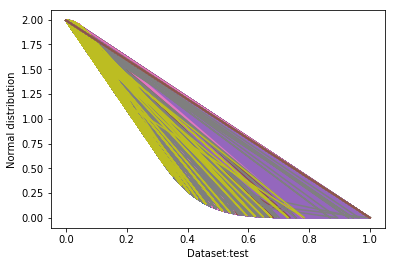

In [5]:
#Numerical values normalization
train1[num_cols] = train1[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
valid1[num_cols] = valid1[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
train2[num_cols] = train2[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
valid2[num_cols] = valid2[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
test[num_cols] = test[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
#print(train1[num_cols])

#"Unknown vals"
#Replacing unknowns with the median since the data is an imbalanced normal curve 
train1[:] = train1[:].replace('unknown',np.NaN)
train1.fillna(train1.median(),inplace=True)
train2[:] = train2[:].replace('unknown',np.NaN)
train2.fillna(train2.median(),inplace=True)
valid1[:] = valid1[:].replace('unknown',np.NaN)
valid1.fillna(valid1.median(),inplace=True)
valid2[:] = valid2[:].replace('unknown',np.NaN)
valid2.fillna(valid2.median(),inplace=True)
test[:] = test[:].replace('unknown',np.NaN)
test.fillna(test.median(),inplace=True)

#Replacing pdays -1 value with median since 85% values are -1
train1['pdays'] = train1.pdays.replace(-1,np.NaN)
train1['pdays'] = train1.pdays.replace(np.NaN,train1['pdays'].median())
valid1['pdays'] = valid1.pdays.replace(-1,np.NaN)
valid1['pdays'] = valid1.pdays.replace(np.NaN,valid1['pdays'].median())
train2['pdays'] = train2.pdays.replace(-1,np.NaN)
train2['pdays'] = train2.pdays.replace(np.NaN,train2['pdays'].median())
valid2['pdays'] = valid2.pdays.replace(-1,np.NaN)
valid2['pdays'] = valid2.pdays.replace(np.NaN,valid2['pdays'].median())
test['pdays'] = test.pdays.replace(-1,np.NaN)
test['pdays'] = test.pdays.replace(np.NaN,valid2['pdays'].median())

#binary vals
train1['housing'] = np.where(train1['housing'].str.contains('yes'),1,0)
train1['loan'] = np.where(train1['loan'].str.contains('yes'),1,0)
train1['y'] = np.where(train1['y'].str.contains('yes'),1,0)
valid1['housing'] = np.where(valid1['housing'].str.contains('yes'),1,0)
valid1['loan'] = np.where(valid1['loan'].str.contains('yes'),1,0)
valid1['y'] = np.where(valid1['y'].str.contains('yes'),1,0)
train2['housing'] = np.where(train2['housing'].str.contains('yes'),1,0)
train2['loan'] = np.where(train2['loan'].str.contains('yes'),1,0)
train2['y'] = np.where(train2['y'].str.contains('yes'),1,0)
valid2['housing'] = np.where(valid2['housing'].str.contains('yes'),1,0)
valid2['loan'] = np.where(valid2['loan'].str.contains('yes'),1,0)
valid2['y'] = np.where(valid2['y'].str.contains('yes'),1,0)
test['housing'] = np.where(test['housing'].str.contains('yes'),1,0)
test['loan'] = np.where(test['loan'].str.contains('yes'),1,0)
test['y'] = np.where(test['y'].str.contains('yes'),1,0)


#cat values
train1 = pd.get_dummies(train1, columns=['marital','default','job','education','contact','poutcome','month'])

valid1 = pd.get_dummies(valid1, columns=['marital','default','job','education','contact','poutcome','month'])

train2 = pd.get_dummies(train2, columns=['marital','default','job','education','contact','poutcome','month'])

valid2 = pd.get_dummies(valid2, columns=['marital','default','job','education','contact','poutcome','month'])

test = pd.get_dummies(test, columns=['marital','default','job','education','contact','poutcome','month'])
#print(train1)
plt.title('Normal distributions of the datasets given:\n')

plt.plot(train1, norm.pdf(train1, 0, 0.2));
plt.xlabel('Dataset:train1'),plt.ylabel('Normal distribution')
plt.show()

plt.plot(valid1, norm.pdf(valid1, 0, 0.2));
plt.xlabel('Dataset:valid1'),plt.ylabel('Normal distribution')
plt.show()

plt.plot(train2, norm.pdf(train2, 0, 0.2));
plt.xlabel('Dataset:train2'),plt.ylabel('Normal distribution')
plt.show()

plt.plot(valid2, norm.pdf(valid2, 0, 0.2));
plt.xlabel('Dataset:valid2'),plt.ylabel( 'Normal distribution')
plt.show()

plt.plot(test, norm.pdf(test, 0, 0.2));
plt.xlabel('Dataset:test'),plt.ylabel('Normal distribution')
plt.show()

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Lambda :  0.78
Training Accuracy : 0.8305510415127788
Validation Accuracy : 0.8257531010041347
Testing Accuracy : 0.8196395001658742


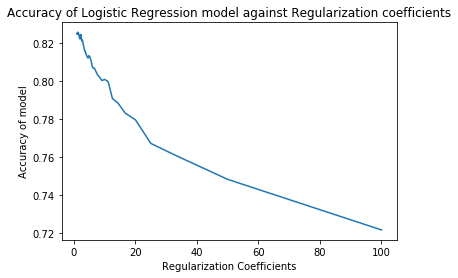

In [2]:
# PROBLEM 1, TASK 2 CODE GOES HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

train1 = pd.read_csv('train_1.csv')
valid1 = pd.read_csv('valid_1.csv')
test = pd.read_csv('test.csv')
num_cols = ['age','balance','day','duration','campaign','pdays','previous']#numerical features
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

train1[num_cols] = train1[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
valid1[num_cols] = valid1[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
test[num_cols] = test[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))

#"Unknown vals"
train1[:] = train1[:].replace('unknown',np.NaN)
train1.fillna(train1.median(),inplace=True)
valid1[:] = valid1[:].replace('unknown',np.NaN)
valid1.fillna(valid1.median(),inplace=True)
test[:] = test[:].replace('unknown',np.NaN)
test.fillna(test.median(),inplace=True)
train1['pdays'] = train1.pdays.replace(-1,np.NaN)
valid1['pdays'] = valid1.pdays.replace(-1,np.NaN)
test['pdays'] = test.pdays.replace(-1,np.NaN)

#binary vals
train1['housing'] = np.where(train1['housing'].str.contains('yes'),1,0)
train1['loan'] = np.where(train1['loan'].str.contains('yes'),1,0)
train1['y'] = np.where(train1['y'].str.contains('yes'),1,0)
valid1['housing'] = np.where(valid1['housing'].str.contains('yes'),1,0)
valid1['loan'] = np.where(valid1['loan'].str.contains('yes'),1,0)
valid1['y'] = np.where(valid1['y'].str.contains('yes'),1,0)
test['housing'] = np.where(test['housing'].str.contains('yes'),1,0)
test['loan'] = np.where(test['loan'].str.contains('yes'),1,0)
test['y'] = np.where(test['y'].str.contains('yes'),1,0)

#cat values
train1 = pd.get_dummies(train1, columns=['marital','default','job','education','contact','poutcome','month'])

valid1 = pd.get_dummies(valid1, columns=['marital','default','job','education','contact','poutcome','month'])

test = pd.get_dummies(test, columns=['marital','default','job','education','contact','poutcome','month'])


X_train= train1.drop(['y'],axis=1)
Y_train= train1['y']
X_valid= valid1.drop(['y'],axis=1)
Y_valid= valid1['y']
X_test= test.drop(['y'],axis=1)
Y_test= test['y']

training_scores = []
validation_scores = []
testing_scores = []
c=np.arange(0.01,1.0,0.01)
for i in c:
    
    logreg=LogisticRegression(C=i, max_iter=250,penalty='l2',solver='lbfgs')
    lr = logreg.fit(X_train,Y_train)
    y_pred = logreg.predict(X_valid)
    training_scores.append(logreg.score(X_train, Y_train))
    validation_scores.append(logreg.score(X_valid, Y_valid))
    testing_scores.append(logreg.score(X_test, Y_test))
    
plt.plot(1/c,validation_scores)
plt.title("Accuracy of Logistic Regression model against Regularization coefficients")
plt.xlabel("Regularization Coefficients")
plt.ylabel("Accuracy of model")
#print(1/c,acc)
print("Lambda : ", c[np.argmax(validation_scores)])
print("Training Accuracy :", training_scores[np.argmax(validation_scores)])
print("Validation Accuracy :", validation_scores[np.argmax(validation_scores)])
print("Testing Accuracy :", testing_scores[np.argmax(validation_scores)])
plt.show()




### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Lambda :  0.009000000000000001
Training Accuracy : 0.889887329785028
Validation Accuracy : 0.8901022947193807
Testing Accuracy : 0.8904124737365918


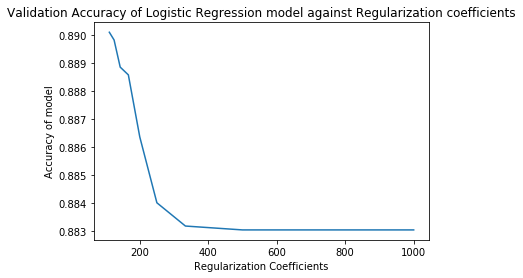

In [3]:
# PROBLEM 1, TASK 3 CODE GOES HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

train2 = pd.read_csv('train_2.csv')
valid2 = pd.read_csv('valid_2.csv')
test = pd.read_csv('test.csv')
num_cols = ['age','balance','day','duration','campaign','pdays','previous']#numerical features
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

train2[num_cols] = train2[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
valid2[num_cols] = valid2[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
test[num_cols] = test[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))

#"Unknown vals"
train2[:] = train2[:].replace('unknown',np.NaN)
train2.fillna(train2.median(),inplace=True)
valid2[:] = valid2[:].replace('unknown',np.NaN)
valid2.fillna(valid2.median(),inplace=True)
test[:] = test[:].replace('unknown',np.NaN)
test.fillna(test.median(),inplace=True)
train2['pdays'] = train2.pdays.replace(-1,np.NaN)
valid2['pdays'] = valid2.pdays.replace(-1,np.NaN)
test['pdays'] = test.pdays.replace(-1,np.NaN)

#binary vals
train2['housing'] = np.where(train2['housing'].str.contains('yes'),1,0)
train2['loan'] = np.where(train2['loan'].str.contains('yes'),1,0)
train2['y'] = np.where(train2['y'].str.contains('yes'),1,0)
valid2['housing'] = np.where(valid2['housing'].str.contains('yes'),1,0)
valid2['loan'] = np.where(valid2['loan'].str.contains('yes'),1,0)
valid2['y'] = np.where(valid2['y'].str.contains('yes'),1,0)
test['housing'] = np.where(test['housing'].str.contains('yes'),1,0)
test['loan'] = np.where(test['loan'].str.contains('yes'),1,0)
test['y'] = np.where(test['y'].str.contains('yes'),1,0)

#cat values
train2 = pd.get_dummies(train2, columns=['marital','default','job','education','contact','poutcome','month'])

valid2 = pd.get_dummies(valid2, columns=['marital','default','job','education','contact','poutcome','month'])

test = pd.get_dummies(test, columns=['marital','default','job','education','contact','poutcome','month'])

def accuracy(y_pred,y_actual):
    acc = np.mean(y_actual==y_pred)
    return acc

X2_train= train2.drop(['y'],axis=1)
Y2_train= train2['y']
X2_valid= valid2.drop(['y'],axis=1)
Y2_valid= valid2['y']
X_test= test.drop(['y'],axis=1)
Y_test= test['y']

training_scores = []
validation_scores = []
testing_scores = []
c=np.arange(0.001,0.01,0.001)
for i in c:
    logreg=LogisticRegression(C=i, max_iter=250,penalty='l2',solver='lbfgs')
    lr = logreg.fit(X2_train,Y2_train)
    y_pred = logreg.predict(X2_valid)
    training_scores.append(logreg.score(X2_train, Y2_train))
    validation_scores.append(logreg.score(X2_valid, Y2_valid))
    testing_scores.append(logreg.score(X_test, Y_test))
 
plt.plot(1/c,validation_scores)
plt.title("Validation Accuracy of Logistic Regression model against Regularization coefficients")
plt.xlabel("Regularization Coefficients")
plt.ylabel("Accuracy of model")
print("Lambda : ", c[np.argmax(validation_scores)])
print("Training Accuracy :", training_scores[np.argmax(validation_scores)])
print("Validation Accuracy :", validation_scores[np.argmax(validation_scores)])
print("Testing Accuracy :", testing_scores[np.argmax(validation_scores)])
plt.show()


### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

Thereshold value selected: [0.64900918]
Accuracy of model is valid set: 0.8949405584738734
Accuracy of model is test set for same threshold value: 0.8947252018135574


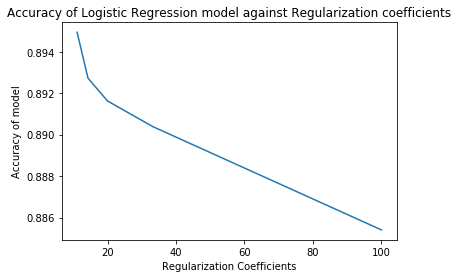

Thereshold value selected: [0.22824057]
Accuracy of model is valid set: 0.8910699474702792
Accuracy of model is test set for same threshold value: 0.8812341037266394


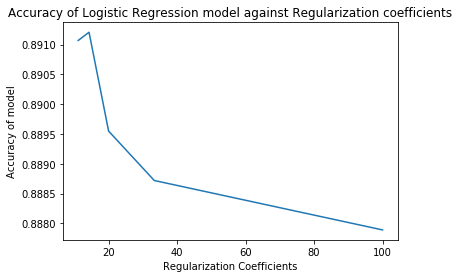

Thereshold value selected: [0.63159557]
Accuracy of model is valid set: 0.895355266795687
Accuracy of model is test set for same threshold value: 0.8947252018135574


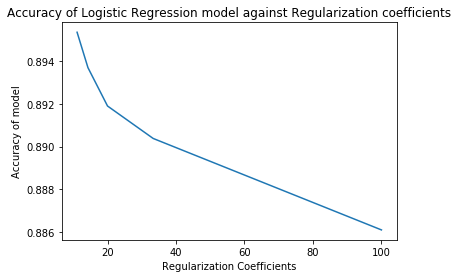

Thereshold value selected: [0.33199229]
Accuracy of model is valid set: 0.897843516726569
Accuracy of model is test set for same threshold value: 0.9000331748313612


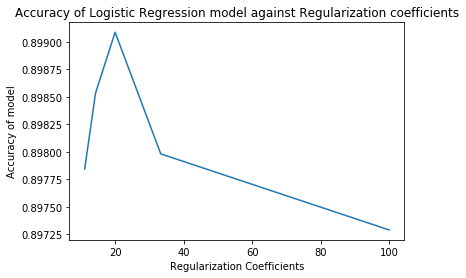

Thereshold value selected: [0.01619022]
Accuracy of model is valid set: 0.1439037876693392
Accuracy of model is test set for same threshold value: 0.13789671569169526


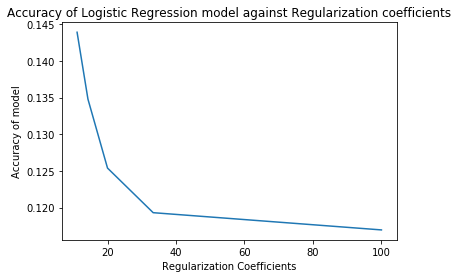

In [6]:
# PROBLEM 1, TASK 4 CODE GOES HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import random

train2 = pd.read_csv('train_2.csv')
valid2 = pd.read_csv('valid_2.csv')
test = pd.read_csv('test.csv')
num_cols = ['age','balance','day','duration','campaign','pdays','previous']#numerical features
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

train2[num_cols] = train2[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
valid2[num_cols] = valid2[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))
test[num_cols] = test[num_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()))

#"Unknown vals"
train2[:] = train2[:].replace('unknown',np.NaN)
train2.fillna(train2.median(),inplace=True)
valid2[:] = valid2[:].replace('unknown',np.NaN)
valid2.fillna(valid2.median(),inplace=True)
test[:] = test[:].replace('unknown',np.NaN)
test.fillna(test.median(),inplace=True)
train2['pdays'] = train2.pdays.replace(-1,np.NaN)
valid2['pdays'] = valid2.pdays.replace(-1,np.NaN)
test['pdays'] = test.pdays.replace(-1,np.NaN)

#binary vals
train2['housing'] = np.where(train2['housing'].str.contains('yes'),1,0)
train2['loan'] = np.where(train2['loan'].str.contains('yes'),1,0)
train2['y'] = np.where(train2['y'].str.contains('yes'),1,0)
valid2['housing'] = np.where(valid2['housing'].str.contains('yes'),1,0)
valid2['loan'] = np.where(valid2['loan'].str.contains('yes'),1,0)
valid2['y'] = np.where(valid2['y'].str.contains('yes'),1,0)
test['housing'] = np.where(test['housing'].str.contains('yes'),1,0)
test['loan'] = np.where(test['loan'].str.contains('yes'),1,0)
test['y'] = np.where(test['y'].str.contains('yes'),1,0)

#cat values
train2 = pd.get_dummies(train2, columns=['marital','default','job','education','contact','poutcome','month'])

valid2 = pd.get_dummies(valid2, columns=['marital','default','job','education','contact','poutcome','month'])

test = pd.get_dummies(test, columns=['marital','default','job','education','contact','poutcome','month'])

def accuracy(y_pred,y_actual):
    diff = y_pred - y_actual
    return 1.0 - float(np.count_nonzero(diff)/len(diff)) 

X3_train = train2.drop(['y'],axis=1)
Y3_train = train2['y']

valid_x2 = valid2.drop(['y'],axis=1)
valid_y2 = valid2['y']

X_test= test.drop(['y'],axis=1)
Y_test= test['y']
#theta = [0.25,0.42,0.5,0.55,0.61]
theta = np.random.rand(5, 1)
c=np.arange(0.01,0.1,0.02)

for j in theta:
    acc=[]
    for i in c:
        logreg=LogisticRegression(C=i, max_iter=250,penalty='l2',solver='lbfgs')
        lr = logreg.fit(X3_train,Y3_train)
        #print(logreg.predict_proba(valid_x2).shape)
        y_pred = (logreg.predict_proba(valid_x2)[:,1]>=j).astype(int)
        y_pred_0 = (logreg.predict_proba(valid_x2)[:,1]<=j).astype(int)
        accuracy_score = accuracy(valid_y2,y_pred)
        #accuracy_test = logreg.score(X_test,Y_test)
        y_pred_test = (logreg.predict_proba(X_test)[:,1]>=j).astype(int)
        accuracy_test = accuracy(Y_test,y_pred_test)
        acc.append(accuracy_score)
    plt.plot(1/c,acc)
    print('Thereshold value selected:',j)
    print('Accuracy of model is valid set:',accuracy_score)
    print('Accuracy of model is test set for same threshold value:',accuracy_test)
    plt.title("Accuracy of Logistic Regression model against Regularization coefficients")
    plt.xlabel("Regularization Coefficients")
    plt.ylabel("Accuracy of model")
    plt.show()
    

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
Answer:
For regularization model, we know that the goal for the unregularized model is to minimize the convex logistic cost function. By making the model too sensitive to the pecularities, we have the risk of model picking up unwanted noise in the data. So by choosing the regularization coefficients, we are basically setting the trade-off between bias and variance. Adding up too much of bias, if the model suffers from low variance, leads to underfitting whereas increasing the bias too much for high variance would lead to overfitting.Thus , we are basically adjusting the weights by changing the regularization strengths until we obtain the least cost function.
In all the three models, we are building the logistic regression model on the training set and use the same to predict the values for validation set. By adjusting on the values of lambda (in models A,B and C) and theta( in model C) we are finding a value for lambda and theta where validation accuracy is maximum. Based on that values for lambda and theta we are evaluating the accuracy of model on test set.
Model A:
The train and valid sets are used for training the polynomial model to fit each feature of the dataset linearly. This dataset trains the model to minimize the error  so that the function generalizes and makes accurate predictions on the unseen data(ie train set). By varying the regularization strength(c) from 0.01 to 1.0, the Regularization parameter(lambda= 1/c) was chosen. This set gave me an accuracy of around 82%. The same regularization parameter was verified by the test set which gave me the accuracy of 81.8%. This means that the trade-off for bias and variance chosen was appropriate for the model.
Model B:
This testing was similar to the earlier one except for the fact of change in the dataset from the earlier one. Here the same function is tested for another dataset having the same features for the same increments in the range(0.01 to 1.0) of the regularization coefficients. This then outputs the accuracy of 89% for both the cases, ie my accuracy for train-valid pair and for train-test pair. This shows that the regularization coefficient selected works well for both the models A and B. This approves my selection of bias and variance for obtaining the highest accuracy.
Model C:
Model C is testing the chosen model for various threshold values within my range of selected lambdas. The output 'y' signifies whether the clien has subscribed term deposit or not. For all the threshold values selected, the accuracy for train-valid and train- test sets were printed. In train2-valid2, for a threshold of 0.5, the observation is 89% accurate but this does not specify how accurately the model predicts that the client does not subscribe for the term deposit. This approach does not identify the maximum likelihood between people not subscribing for term deposits.Here as we are tuning threshold it is likely that the validation accuracy for a given regularization parameter value and threshold value are higher than the training set accuracy.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.
Answer:
Accuracy is helpful for tuning the lambda and coefficient values.From accuracy we cannot find the recall or precision values whose trade-off gives us the optimum performance value. Neither does the model specify the sensitivity or  specificity at a particular value of theta. At some instances unequal weights are given to false negative or false positive values which differ the actual and predicted proportions. This makes only accuracy not a sufficient metric for choosing threshold and c.

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

Enter the degree of the polynomial:6


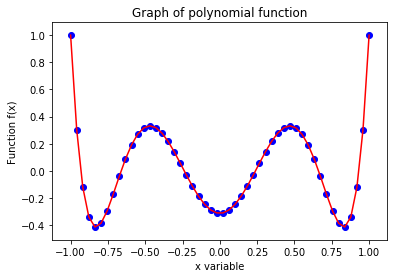

In [5]:
"""import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
   
    #The coefficients returned are in the order w_0, w_1, ... , w_{degree}
  
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    pass

## TEST CASES (The following lines should plot a function)
# visualize_funtion(3, -1, 1)
# visualize_funtion(4, -1, 1)
# visualize_funtion(6, -1, 1)"""
    
import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt

def get_coefficients(degree):
    #print(legendre(degree).coefficients[::-1])

    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    #print(w)
    m = len(w)
    
    Y=0
    for i in range(m):
        Y += (w[i] * X**[i])
        #print("Y:",Y)
    return Y

X = np.linspace(-1 ,1 ,50)
#print(X)

degree=int(input("Enter the degree of the polynomial:"))
plt.plot(X,visualize_function(degree, -1, 1),color='red')
plt.scatter(X,visualize_function(degree, -1, 1),color='blue')

plt.title('Graph of polynomial function')
plt.xlabel('x variable')
plt.ylabel('Function f(x)')
plt.show()

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



Enter the required values
Enter degree of poly6
Enter training sample number20
Enter testing sample number20
[ 0.23614642  0.11597308 -0.08633705 -0.26346486 -0.10110871  0.12983975
 -0.1036803  -0.08663492  0.05990808 -0.01745956 -0.10118658 -0.1335391
  0.17706076  0.08312068  0.1861037  -0.46306784  0.10192084  0.15806266
  0.12119313  0.13750733]
[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


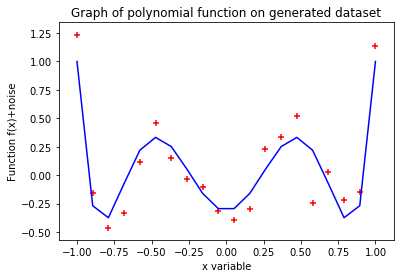

In [2]:
#def generate_dataset(degree, n_train, n_test, sigma):
"""
- n_train - Number of training samples
- n_test - Number of test samples
- X_train is an array of size (n_train $\times$ 1)
- y_train is an array of size (n_train $\times$ 1)
- X_test is an array of size (n_test $\times$ 1)
- y_test is an array of size (n_test $\times$ 1)
"""
   # w = get_coefficients(degree)
   # return X_train, y_train, X_test, y_test
import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]
    
def generate_dataset(degree, n_train, n_test, sigma):
    w = get_coefficients(degree)
    X_train = np.linspace(-1,1,n_train)
    X_test = np.linspace(-1,1,n_test)
    #print("X:",X_train.shape)
    
    y_train = 0
    y_test = 0
    
    
    for i in range(len(w)): 

        y_train += (w[i] * X_train**[i])
        y_test += (w[i] * X_test**[i])
        
    return X_train, y_train, X_test, y_test

#print ("Y",y_train.shape)


#generate_dataset(degree, n_train, n_test, sigma)
print('Enter the required values')
s=0.2
X_train, y_train, X_test, y_test = generate_dataset(int(input('Enter degree of poly')), int(input('Enter training sample number')),int(input('Enter testing sample number')) , sigma=s)
#X_train, y_train, X_test, y_test = generate_dataset(6, 20, 20, 0.2)
noise = np.random.normal(0,0.2,X_train.shape)
print(noise)
print(X_train)
Noise = y_train + noise
plt.plot(X_train,y_train,color='blue')
plt.scatter(X_train,Noise,color='red',marker='+')
plt.title('Graph of polynomial function on generated dataset')
plt.xlabel('x variable')
plt.ylabel('Function f(x)+noise')
plt.show()

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 The results are as expected, for quadratic polynomial the mse is low for quadratic polynomial as it underfits the curve. But for Model B, the error is higher as it starts to overfit the polynomial curve because of the higher power of degree. 
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

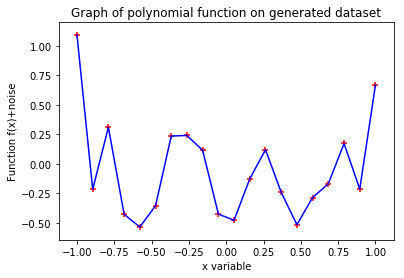

+-------------------------+----------+------------------------+
|          Model          | Accuracy | Root mean square error |
+=========================+==========+========================+
| Model A Quadratic:train | 0.268    | 0.344                  |
+-------------------------+----------+------------------------+
| Model A Quadratic:test  | 0.268    | 0.344                  |
+-------------------------+----------+------------------------+
| Model B deg=10:train    | 0.937    | 0.103                  |
+-------------------------+----------+------------------------+
| Model B deg=10:test     | 0.937    | 0.103                  |
+-------------------------+----------+------------------------+


In [2]:
#def generate_dataset(degree, n_train, n_test, sigma):
"""
- n_train - Number of training samples
- n_test - Number of test samples
- X_train is an array of size (n_train $\times$ 1)
- y_train is an array of size (n_train $\times$ 1)
- X_test is an array of size (n_test $\times$ 1)
- y_test is an array of size (n_test $\times$ 1)
"""

import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import texttable as tt

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]
    
def generate_dataset(degree, n_train, n_test, sigma):
    w = get_coefficients(degree)
    X_train = np.linspace(-1,1,n_train)
    X_test = np.linspace(-1,1,n_test)
    #print("X:",X_train.shape)
    
    y_train = 0
    y_test = 0
    
    for i in range(len(w)): 

        y_train += (w[i] * X_train**[i])
        y_test += (w[i] * X_test**[i])
    return X_train, y_train, X_test, y_test

#print ("Y",y_train.shape)


#generate_dataset(degree, n_train, n_test, sigma)
X_train, y_train, X_test, y_test  = generate_dataset(10, 20, 20, 0.2)
noise = np.random.normal(0,0.2,X_train.shape)
Noise = y_train + noise
Noise_test = y_test + noise
plt.plot(X_train,Noise,color='blue')
plt.scatter(X_train,Noise,color='red',marker='+')
plt.title('Graph of polynomial function on generated dataset')
plt.xlabel('x variable')
plt.ylabel('Function f(x)+noise')
plt.show()

# transforming the data to include another axis
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_train_n = Noise[:, np.newaxis]
y_test_n = Noise_test[:, np.newaxis]

#Model for polynomial of degree=2
poly = PolynomialFeatures(degree=2)

x_poly_tr = poly.fit_transform(X_train)
x_poly_ts = poly.fit_transform(X_test)

lr_train = LinearRegression().fit(x_poly_tr,y_train_n)
lr_test = LinearRegression().fit(x_poly_ts,y_test_n)

y_pred_train = lr_train.predict(x_poly_tr)
y_pred_test = lr_test.predict(x_poly_ts)

r2_tr = r2_score(y_train_n,y_pred_train)
r2_ts = r2_score(y_test_n,y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))


#Model for polynomial of degree=10 
poly = PolynomialFeatures(degree=10)
x_poly_tr = poly.fit_transform(X_train)
x_poly_ts = poly.fit_transform(X_test)

lr_train = LinearRegression().fit(x_poly_tr,y_train_n)
lr_test = LinearRegression().fit(x_poly_ts,y_test_n)

y_pred_train = lr_train.predict(x_poly_tr)
y_pred_test = lr_test.predict(x_poly_ts)

r2_tr_1 = r2_score(y_train_n,y_pred_train)
r2_ts_1 = r2_score(y_test_n,y_pred_test)


rmse_train_1 = np.sqrt(mean_squared_error(y_train_n,y_pred_train))
rmse_test_1 = np.sqrt(mean_squared_error(y_test_n,y_pred_test))


t = tt.Texttable()
t.add_rows([['Model','Accuracy','Root mean square error'],['Model A Quadratic:train',r2_tr,rmse_train],['Model A Quadratic:test',r2_ts,rmse_test],['Model B deg=10:train',r2_tr_1,rmse_train_1],['Model B deg=10:test',r2_ts_1,rmse_test_1]])
print(t.draw())


### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.
Answer: The scatter points fit the curve exactly because the output function does not contain noise here. Most of the points are lying on the curve of polynomial function. Also, the mean square error for quadratic polynomial of both train and test sets  is less as it underfits the curve for degree=45. Model B has a higher error as the higher power of degree overfits the curve. 

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

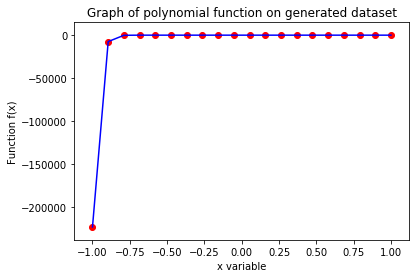

+-------------------------+----------+------------------------+
|          Model          | Accuracy | Root mean square error |
+=========================+==========+========================+
| Model A Quadratic:train | 0.357    | 38898.774              |
+-------------------------+----------+------------------------+
| Model A Quadratic:test  | 0.357    | 38898.774              |
+-------------------------+----------+------------------------+
| Model B deg=10:train    | 0.999    | 1477.209               |
+-------------------------+----------+------------------------+
| Model B deg=10:test     | 0.999    | 1477.209               |
+-------------------------+----------+------------------------+


In [3]:
#def generate_dataset(degree, n_train, n_test, sigma):
"""
- n_train - Number of training samples
- n_test - Number of test samples
- X_train is an array of size (n_train $\times$ 1)
- y_train is an array of size (n_train $\times$ 1)
- X_test is an array of size (n_test $\times$ 1)
- y_test is an array of size (n_test $\times$ 1)
"""

import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import texttable as tt

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]
    
def generate_dataset(degree, n_train, n_test, sigma):
    w = get_coefficients(degree)
    X_train = np.linspace(-1,1,n_train)
    X_test = np.linspace(-1,1,n_test)
    #print("X:",X_train.shape)
    
    y_train = 0
    y_test = 0
    
    for i in range(len(w)): 

        y_train += (w[i] * X_train**[i])
        y_test += (w[i] * X_test**[i])
        
    return X_train, y_train, X_test, y_test

#print ("Y",y_train.shape)


#generate_dataset(degree, n_train, n_test, sigma)
X_train, y_train, X_test, y_test = generate_dataset(45, 20, 20, 0.2)

plt.plot(X_train,y_train,color='blue')
plt.scatter(X_train,y_train,color='red')
plt.title('Graph of polynomial function on generated dataset')
plt.xlabel('x variable')
plt.ylabel('Function f(x)')
plt.show()

# transforming the data to include another axis
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

#Model for Quadratic polynomial
poly = PolynomialFeatures(degree=2)

x_poly_tr = poly.fit_transform(X_train)
x_poly_ts = poly.fit_transform(X_test)

lr_train = LinearRegression().fit(x_poly_tr,y_train)
lr_test = LinearRegression().fit(x_poly_ts,y_test)

y_pred_train = lr_train.predict(x_poly_tr)
y_pred_test = lr_test.predict(x_poly_ts)

r2_tr = r2_score(y_train,y_pred_train)
r2_ts = r2_score(y_train,y_pred_train)

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

#model for polynomial degree=10
poly = PolynomialFeatures(degree=10)
x_poly_tr = poly.fit_transform(X_train)
x_poly_ts = poly.fit_transform(X_test)

lr_train = LinearRegression().fit(x_poly_tr,y_train)
lr_test = LinearRegression().fit(x_poly_ts,y_test)

y_pred_train = lr_train.predict(x_poly_tr)
y_pred_test = lr_test.predict(x_poly_ts)

r2_tr_1 = r2_score(y_train,y_pred_train)
r2_ts_1 = r2_score(y_train,y_pred_train)

rmse_train_1 = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_1 = np.sqrt(mean_squared_error(y_test,y_pred_test))

t = tt.Texttable()
t.add_rows([['Model','Accuracy','Root mean square error'],['Model A Quadratic:train',r2_tr,rmse_train],['Model A Quadratic:test',r2_ts,rmse_test],['Model B deg=10:train',r2_tr_1,rmse_train_1],['Model B deg=10:test',r2_ts_1,rmse_test_1]])
print(t.draw())